# Subscription Disputes: Predictive Modelling

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [86]:
# import data
df = pd.read_csv('unified_payments.csv')
df

,id,Description,Seller Message,Created (UTC),Amount,Status,Card ID,Card Brand,Card Funding,Card Address City,Card Address State,Card Address Country,Card Issue Country,Card Fingerprint,Disputed Amount,Dispute Status,Dispute Reason,Dispute Date (UTC)
0,ch_3NOsCuI0IKHUYx9W1HCqn8Mx,NaN,Payment complete.,2023-07-01 1:02,19.0,Paid,card_1NOsCuI0IKHUYx9WXBF00fK7,MasterCard,credit,PARADISE,SA,AU,AU,EHno1gCBcIfyELwX,NaN,NaN,NaN,NaN
1,ch_3NOsCrI0IKHUYx9W1UPKK5lA,NaN,Payment complete.,2023-07-01 1:02,1.0,Refunded,card_1NOsCrI0IKHUYx9WFZIMvALV,MasterCard,credit,PARADISE,SA,AU,AU,EHno1gCBcIfyELwX,NaN,NaN,NaN,NaN
2,ch_3NOpTUI0IKHUYx9W0su10iYi,Ticket Subscription,Payment complete.,2023-06-30 22:07,94.0,Paid,card_1NOpTUI0IKHUYx9WaKe13D4g,MasterCard,debit,Lecanto,FL,US,US,HFuQBeC8TeWfIK7s,NaN,NaN,NaN,NaN
3,ch_3NOpTQI0IKHUYx9W0I8pPMmd,Ticket Subscription,Payment complete.,2023-06-30 22:07,13.0,Paid,card_1NOpTQI0IKHUYx9WizKidsFO,MasterCard,debit,Dundee,MI,US,US,UT156n14F6Rd4V35,NaN,NaN,NaN,NaN
4,ch_3NOpTOI0IKHUYx9W041AYyrt,Ticket Subscription,Payment complete.,2023-06-30 22:07,35.0,Paid,card_1NOpTOI0IKHUYx9WEpnGbDUg,MasterCard,credit,Carlton,NSW,AU,AU,Cctzc15p1gzfn4R9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91486,ch_1HipcWI0IKHUYx9WvhIUakSu,Ticket Subscription,Payment complete.,2020-11-01 23:05,13.0,Paid,card_1HipcVI0IKHUYx9Wvk063XUa,Visa,debit,Long Beach,CA,US,US,TmsWQB6KIZfwKDuR,NaN,NaN,NaN,NaN
91487,ch_1HipcPI0IKHUYx9WVvrDX8v7,Ticket Subscription,The bank returned the decline code `transactio...,2020-11-01 23:05,13.0,Failed,card_1HipcPI0IKHUYx9Wo0RqcXNM,Visa,debit,Liphook,Hampshire,GB,GB,1DcsqGvR0tnitsmI,NaN,NaN,NaN,NaN
91488,ch_1HipcLI0IKHUYx9Wfv0eEbGe,Ticket Subscription,The bank returned the decline code `do_not_hon...,2020-11-01 23:05,13.0,Failed,card_1HipcLI0IKHUYx9W6WL8GrHA,Visa,credit,Loon op Zand,Noord Brabant,NL,NL,cDURZAO7LATwcXN7,NaN,NaN,NaN,NaN
91489,ch_1Hipc6I0IKHUYx9W5Lbfp5Np,Ticket Subscription,Payment complete.,2020-11-01 23:05,13.0,Paid,card_1Hipc6I0IKHUYx9WMrHnJeq8,Visa,debit,stourbridge,west midlands,GB,GB,H0nnmnJm4IkQYrfE,NaN,NaN,NaN,NaN


## Exploratory Data Analysis 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91491 entries, 0 to 91490
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    91491 non-null  object 
 1   Description           81860 non-null  object 
 2   Seller Message        91490 non-null  object 
 3   Created (UTC)         91491 non-null  object 
 4   Amount                91491 non-null  float64
 5   Status                91491 non-null  object 
 6   Card ID               91491 non-null  object 
 7   Card Brand            91491 non-null  object 
 8   Card Funding          91491 non-null  object 
 9   Card Address City     91478 non-null  object 
 10  Card Address State    90954 non-null  object 
 11  Card Address Country  91440 non-null  object 
 12  Card Issue Country    91449 non-null  object 
 13  Card Fingerprint      91491 non-null  object 
 14  Disputed Amount       313 non-null    float64
 15  Dispute Status     

In [88]:
# feature engineering Created (UTC) column
df['Sale Date'] = pd.to_datetime(df['Created (UTC)'])
df['Year'] = df['Sale Date'].dt.year
df['Month'] = df['Sale Date'].dt.month
df['Day'] = df['Sale Date'].dt.day

In [89]:
# find observations to drop
print("Missing Values Distribution:")
print(df.isnull().sum())
print("")

Missing Values Distribution:
id                          0
Description              9631
Seller Message              1
Created (UTC)               0
Amount                      0
Status                      0
Card ID                     0
Card Brand                  0
Card Funding                0
Card Address City          13
Card Address State        537
Card Address Country       51
Card Issue Country         42
Card Fingerprint            0
Disputed Amount         91178
Dispute Status          91178
Dispute Reason          91178
Dispute Date (UTC)      91178
Sale Date                   0
Year                        0
Month                       0
Day                         0
dtype: int64



In [90]:
# Compute annual revenue before dropping or imputing
aar = df.groupby(['Year'])['Amount'].sum().reset_index()
aar

,Year,Amount
0,2020,160270.88
1,2021,1229342.00
2,2022,945169.00
3,2023,425186.00


In [91]:
# feature engineering: add Dispute column (Target for Model)
def dispute(row):
    if pd.notnull(row['Disputed Amount']) and row['Disputed Amount'] != 0:
        return 1
    else:
        return 0

df['Dispute'] = df.apply(dispute, axis=1)

In [92]:
# impute missing values in Description
df['Description'] = df['Description'].fillna('promo')

# address null values in Dispute Status, Dispute Reason, Dispute Date (UTC)
numerical_columns = ['Dispute Status', 'Dispute Reason', 'Dispute Date (UTC)']
df[numerical_columns] = df[numerical_columns].fillna(0)
categorical_columns = ['Dispute Status', 'Dispute Reason']
df[categorical_columns] = df[categorical_columns].fillna("None")

# feature engineer the Dispute Data (UTC) column
df['Dispute Date'] = pd.to_datetime(df['Dispute Date (UTC)'])
df['Dispute Year'] = df['Dispute Date'].dt.year
df['Dispute Month'] = df['Dispute Date'].dt.month
df['Dispute Day'] = df['Dispute Date'].dt.day

# drop missing observations (accounts for 1% of total values)
df.dropna(subset=['Card Address State'], inplace=True)
df.dropna(subset=['Card Address Country'], inplace=True)
df.dropna(subset=['Card Issue Country'], inplace=True)
df.dropna(subset=['Seller Message'], inplace=True)
df.dropna(subset=['Card Address City'], inplace=True)

In [93]:
df.describe(include='all')

,id,Description,Seller Message,Created (UTC),Amount,Status,Card ID,Card Brand,Card Funding,Card Address City,Card Address State,Card Address Country,Card Issue Country,Card Fingerprint,Disputed Amount,Dispute Status,Dispute Reason,Dispute Date (UTC),Sale Date,Year,Month,Day,Dispute,Dispute Date,Dispute Year,Dispute Month,Dispute Day
count,90907,90907,90907,90907,90907.000000,90907,90907,90907,90907,90907,90907,90907,90907,90907,313.000000,90907.0,90907.0,90907.0,90907,90907.000000,90907.000000,90907.000000,90907.000000,90907,90907.000000,90907.000000,90907.000000
unique,90907,6,32,16404,NaN,3,90907,6,4,9432,2943,133,112,19636,NaN,5.0,8.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ch_3NOsCuI0IKHUYx9W1HCqn8Mx,Ticket Subscription,Payment complete.,2022-05-09 22:06,NaN,Paid,card_1NOsCuI0IKHUYx9WXBF00fK7,Visa,debit,London,CA,US,US,RW9JFzy63TFkXAp3,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,74499,66862,29,NaN,61954,1,56827,45702,916,5392,42047,42023,68,NaN,90594.0,90594.0,90594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,30.177324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.789681,NaN,NaN,NaN,2022-02-09 09:43:59.625771520,2021.624198,6.310240,15.989176,0.003443,1970-03-07 05:02:25.950476861,1970.176840,1.018645,1.053010
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,2020-11-01 23:05:00,2020.000000,1.000000,1.000000,0.000000,1970-01-01 00:00:00,1970.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,2021-06-14 22:07:00,2021.000000,3.000000,8.000000,0.000000,1970-01-01 00:00:00,1970.000000,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,2022-01-15 23:06:00,2022.000000,6.000000,16.000000,0.000000,1970-01-01 00:00:00,1970.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,2022-10-24 22:06:00,2022.000000,10.000000,24.000000,0.000000,1970-01-01 00:00:00,1970.000000,1.000000,1.000000
max,NaN,NaN,NaN,NaN,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.720000,NaN,NaN,NaN,2023-07-01 01:02:00,2023.000000,12.000000,31.000000,1.000000,2023-07-22 03:36:00,2023.000000,12.000000,31.000000


In [94]:
df.loc[df['Amount'] == 1, 'Description'] = 'verification'

In [95]:
# remove July to have an even two quarters in 2023
df = df.drop(df[df['Month'] == 'July'].index)
df['Description'].unique()

# remove invalid observations
invalid_obs = ['Premium Service', 'Test Product', 'Recurring Payment','Platinum Template', 'PAYMENT - THANK YOU', 'AMAZON AWS', 'datapack']
df = df.drop(df[df['Description'].isin(invalid_obs)].index)

# change 'Ticket Suscription ' to 'Ticket Subscription' in the Description column
df['Description'] = df['Description'].replace(['Ticket Subscription '], 'Ticket Subscription')
df.reset_index()

,index,id,Description,Seller Message,Created (UTC),Amount,Status,Card ID,Card Brand,Card Funding,Card Address City,Card Address State,Card Address Country,Card Issue Country,Card Fingerprint,Disputed Amount,Dispute Status,Dispute Reason,Dispute Date (UTC),Sale Date,Year,Month,Day,Dispute,Dispute Date,Dispute Year,Dispute Month,Dispute Day
0,0,ch_3NOsCuI0IKHUYx9W1HCqn8Mx,promo,Payment complete.,2023-07-01 1:02,19.0,Paid,card_1NOsCuI0IKHUYx9WXBF00fK7,MasterCard,credit,PARADISE,SA,AU,AU,EHno1gCBcIfyELwX,NaN,0,0,0,2023-07-01 01:02:00,2023,7,1,0,1970-01-01,1970,1,1
1,1,ch_3NOsCrI0IKHUYx9W1UPKK5lA,verification,Payment complete.,2023-07-01 1:02,1.0,Refunded,card_1NOsCrI0IKHUYx9WFZIMvALV,MasterCard,credit,PARADISE,SA,AU,AU,EHno1gCBcIfyELwX,NaN,0,0,0,2023-07-01 01:02:00,2023,7,1,0,1970-01-01,1970,1,1
2,2,ch_3NOpTUI0IKHUYx9W0su10iYi,Ticket Subscription,Payment complete.,2023-06-30 22:07,94.0,Paid,card_1NOpTUI0IKHUYx9WaKe13D4g,MasterCard,debit,Lecanto,FL,US,US,HFuQBeC8TeWfIK7s,NaN,0,0,0,2023-06-30 22:07:00,2023,6,30,0,1970-01-01,1970,1,1
3,3,ch_3NOpTQI0IKHUYx9W0I8pPMmd,Ticket Subscription,Payment complete.,2023-06-30 22:07,13.0,Paid,card_1NOpTQI0IKHUYx9WizKidsFO,MasterCard,debit,Dundee,MI,US,US,UT156n14F6Rd4V35,NaN,0,0,0,2023-06-30 22:07:00,2023,6,30,0,1970-01-01,1970,1,1
4,4,ch_3NOpTOI0IKHUYx9W041AYyrt,Ticket Subscription,Payment complete.,2023-06-30 22:07,35.0,Paid,card_1NOpTOI0IKHUYx9WEpnGbDUg,MasterCard,credit,Carlton,NSW,AU,AU,Cctzc15p1gzfn4R9,NaN,0,0,0,2023-06-30 22:07:00,2023,6,30,0,1970-01-01,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90655,91486,ch_1HipcWI0IKHUYx9WvhIUakSu,Ticket Subscription,Payment complete.,2020-11-01 23:05,13.0,Paid,card_1HipcVI0IKHUYx9Wvk063XUa,Visa,debit,Long Beach,CA,US,US,TmsWQB6KIZfwKDuR,NaN,0,0,0,2020-11-01 23:05:00,2020,11,1,0,1970-01-01,1970,1,1
90656,91487,ch_1HipcPI0IKHUYx9WVvrDX8v7,Ticket Subscription,The bank returned the decline code `transactio...,2020-11-01 23:05,13.0,Failed,card_1HipcPI0IKHUYx9Wo0RqcXNM,Visa,debit,Liphook,Hampshire,GB,GB,1DcsqGvR0tnitsmI,NaN,0,0,0,2020-11-01 23:05:00,2020,11,1,0,1970-01-01,1970,1,1
90657,91488,ch_1HipcLI0IKHUYx9Wfv0eEbGe,Ticket Subscription,The bank returned the decline code `do_not_hon...,2020-11-01 23:05,13.0,Failed,card_1HipcLI0IKHUYx9W6WL8GrHA,Visa,credit,Loon op Zand,Noord Brabant,NL,NL,cDURZAO7LATwcXN7,NaN,0,0,0,2020-11-01 23:05:00,2020,11,1,0,1970-01-01,1970,1,1
90658,91489,ch_1Hipc6I0IKHUYx9W5Lbfp5Np,Ticket Subscription,Payment complete.,2020-11-01 23:05,13.0,Paid,card_1Hipc6I0IKHUYx9WMrHnJeq8,Visa,debit,stourbridge,west midlands,GB,GB,H0nnmnJm4IkQYrfE,NaN,0,0,0,2020-11-01 23:05:00,2020,11,1,0,1970-01-01,1970,1,1


   Year          Description    Amount
0  2020  Ticket Subscription  118644.0
1  2020                promo   39890.0
2  2021  Ticket Subscription  826853.0
3  2021                promo  370955.0
4  2022  Ticket Subscription  741020.0
5  2022                promo  190772.0
6  2022         verification    2552.0
7  2023  Ticket Subscription  283794.0
8  2023                promo  135310.0
9  2023         verification    3214.0


<Axes: xlabel='Year', ylabel='Amount'>

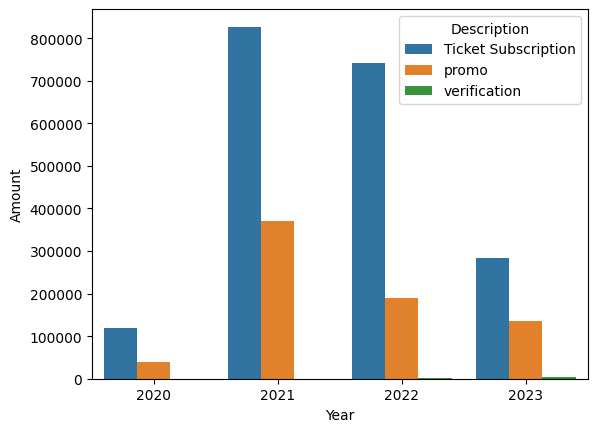

In [96]:
# plot sales by month
yearly_sales = df.groupby(['Year', 'Description'])['Amount'].sum().reset_index()
print(yearly_sales)
sns.barplot(x='Year', y='Amount', data=yearly_sales, hue='Description')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'fraudulent'),
  Text(1, 0, 'subscription_canceled'),
  Text(2, 0, 'credit_not_processed'),
  Text(3, 0, 'general'),
  Text(4, 0, 'unrecognized'),
  Text(5, 0, 'product_not_received'),
  Text(6, 0, 'product_unacceptable')])

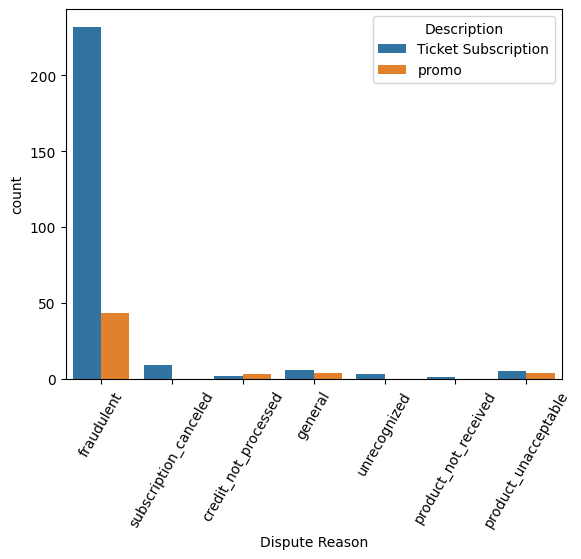

In [97]:
# plot disputes
disputes = df[df['Dispute Reason'] != 0]
sns.countplot(x='Dispute Reason', data=disputes, hue='Description')

# rotate x-axis labels
plt.xticks(rotation=60)


<Axes: xlabel='Card Funding', ylabel='count'>

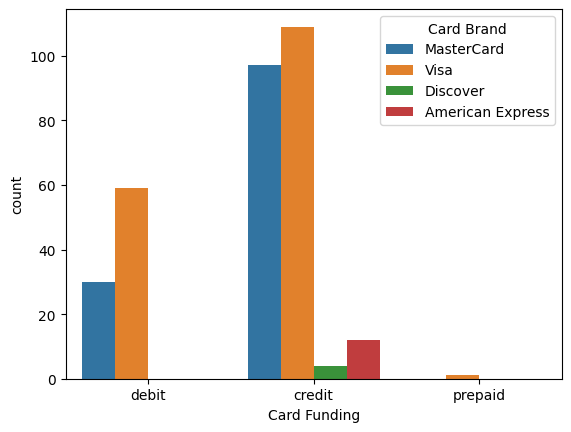

In [98]:
sns.countplot(data=disputes, x='Card Funding', hue='Card Brand')

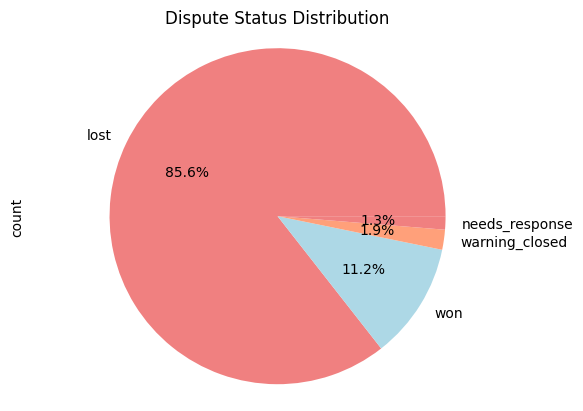

In [99]:
disputes['Dispute Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightsalmon'])
plt.title('Dispute Status Distribution')
plt.axis('equal')
plt.show()

In [100]:
dispute_geo = ((df.groupby(['Card Address Country'])['Disputed Amount'].sum()/df.groupby(['Card Address Country'])['Amount'].sum())*100).sort_values(ascending=False).reset_index()
dispute_geo.rename(columns={'Card Address Country':'Country',0:'Dispute %'},inplace=True)
dispute_geo.head()

,Country,Dispute %
0,NI,39.393939
1,UM,17.549325
2,TF,16.004762
3,JM,13.922865
4,OM,7.104895


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


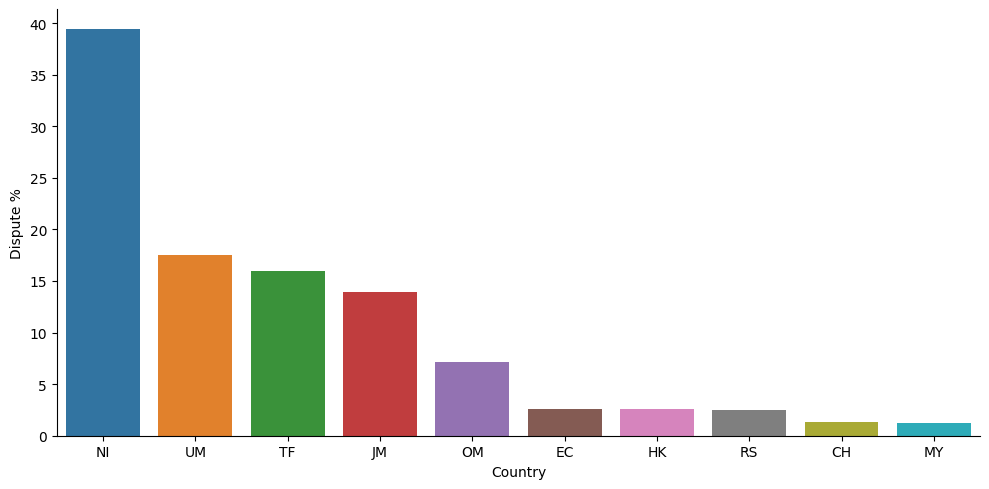

In [101]:
sns.catplot(x='Country', y='Dispute %', data=dispute_geo.head(10), kind='bar', height=5, aspect=2)

In [102]:
country_list = ['NI', 'UM', 'TF', 'JM', 'OM']

# Filter the DataFrame to include only rows with countries in the 'country_list'
grouped_totals = df[df['Card Address Country'].isin(country_list)].groupby('Card Address Country')['Amount'].sum()

grouped_totals

Card Address Country
JM    363.0
NI     66.0
OM    858.0
TF    210.0
UM    963.0
Name: Amount, dtype: float64

In [103]:
grouped_totals.sum()

2460.0

In [104]:
p_blocked_totals = df[df['Card Address Country'].isin(country_list)]
value_p_blocked = p_blocked_totals['Disputed Amount'].sum()
total_dispute_cost = df['Disputed Amount'].sum()

percent_disputes = value_p_blocked/total_dispute_cost
print('Percent of disputes from blocked countries: {:.2%}'.format(percent_disputes))

Percent of disputes from blocked countries: 1.85%


In [105]:
# normalize disputes by total transactions by Description
disputes_desc= (df.groupby('Description')['Disputed Amount'].count()/df.groupby('Description')['id'].count())*100
disputes_desc

Description
Ticket Subscription    0.346313
promo                  0.519481
verification           0.000000
dtype: float64

In [106]:
disputes_percent = (df.groupby(['Description', 'Year', 'Month'])['Disputed Amount'].count()/df.groupby(['Description', 'Year', 'Month'])['Status'].count())*100
disputes_percent = disputes_percent.reset_index()
disputes_percent.rename(columns={'Description':'Description', 'Year':'Year', 0:'Dispute %'},inplace=True)
disputes_percent['Date'] = pd.to_datetime(disputes_percent['Year'].astype(str) + '-' + disputes_percent['Month'].astype(str))
disputes_percent

,Description,Year,Month,Dispute %,Date
0,Ticket Subscription,2020,11,0.859599,2020-11-01
1,Ticket Subscription,2020,12,0.648789,2020-12-01
2,Ticket Subscription,2021,1,0.353774,2021-01-01
3,Ticket Subscription,2021,2,0.290939,2021-02-01
4,Ticket Subscription,2021,3,0.786812,2021-03-01
...,...,...,...,...,...
70,verification,2023,3,0.000000,2023-03-01
71,verification,2023,4,0.000000,2023-04-01
72,verification,2023,5,0.000000,2023-05-01
73,verification,2023,6,0.000000,2023-06-01


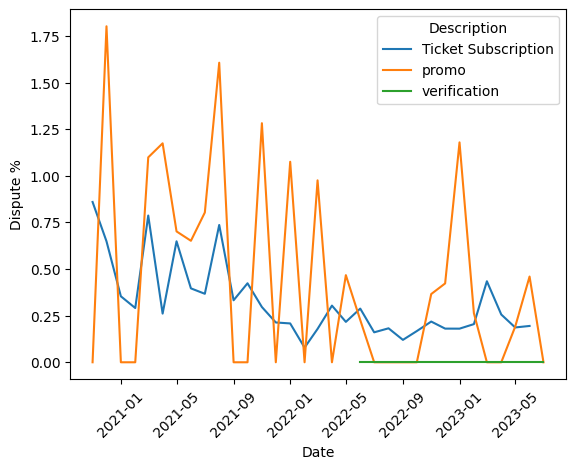

In [107]:
sns.lineplot(x='Date', y='Dispute %', data=disputes_percent, hue='Description')
plt.xticks(rotation=45)
plt.show()

In [108]:
df['Disputed Amount'].fillna(0, inplace=True)
disputes_df = df[df['Disputed Amount'] != 0]

# users to block - repeat offenders
block_cards = disputes_df.value_counts('Card Fingerprint').reset_index()
block_cards.head(30)


,Card Fingerprint,count
0,vXP4eIMWzzuVqaIl,4
1,a5WgSGkrhTQsDmKv,4
2,uFyMonHAV7xE2Vwv,4
3,SIs7e4IOMXQKLOR5,3
4,zfUrOHR39mSyrnDT,3
5,WuIVsgA7NtX5fsCn,3
6,nwXYSxirYlHYjlp0,3
7,t4d2L22cnqANDlJF,3
8,Er6U5PFSYm1PTf5L,2
9,cCPVQb3bhilEFeM8,2


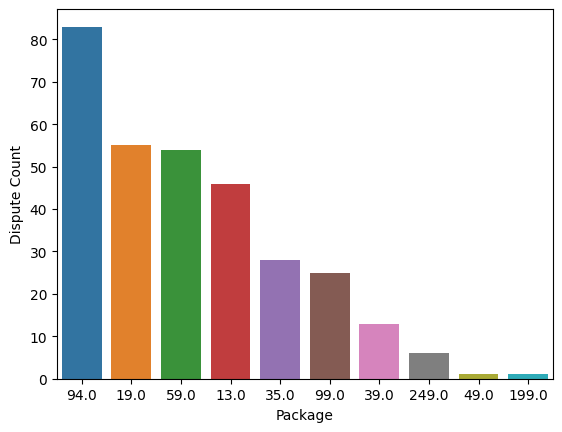

In [109]:
# what package is the most disputed?
most_disputed = disputes_df.value_counts('Amount').reset_index()
most_disputed.columns = ['Package', 'Dispute Count']
plot = most_disputed.sort_values('Dispute Count', ascending=False)

sns.barplot(x='Package', y='Dispute Count', data=plot, order=plot['Package'])
plt.show()


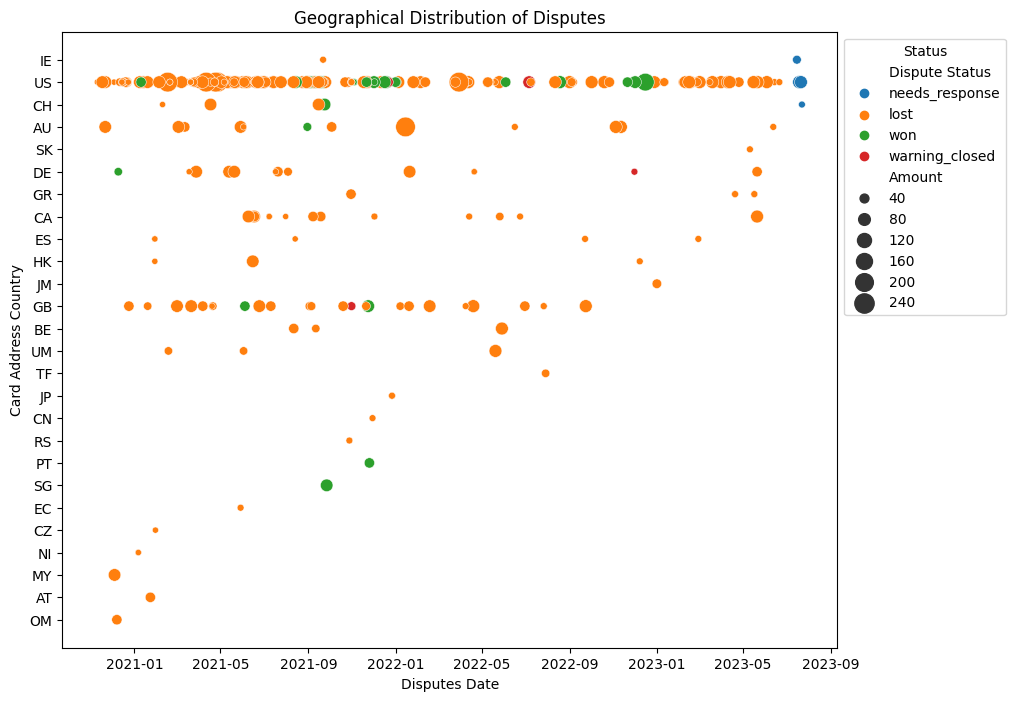

In [110]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=disputes, x='Dispute Date', y='Card Address Country', hue='Dispute Status', size='Amount', sizes=(20, 200))
plt.xlabel('Disputes Date')
plt.ylabel('Card Address Country')
plt.title('Geographical Distribution of Disputes')
plt.legend(title='Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Data Models

### Preprocessing

In [111]:
df.head()

,id,Description,Seller Message,Created (UTC),Amount,Status,Card ID,Card Brand,Card Funding,Card Address City,Card Address State,Card Address Country,Card Issue Country,Card Fingerprint,Disputed Amount,Dispute Status,Dispute Reason,Dispute Date (UTC),Sale Date,Year,Month,Day,Dispute,Dispute Date,Dispute Year,Dispute Month,Dispute Day
0,ch_3NOsCuI0IKHUYx9W1HCqn8Mx,promo,Payment complete.,2023-07-01 1:02,19.0,Paid,card_1NOsCuI0IKHUYx9WXBF00fK7,MasterCard,credit,PARADISE,SA,AU,AU,EHno1gCBcIfyELwX,0.0,0,0,0,2023-07-01 01:02:00,2023,7,1,0,1970-01-01,1970,1,1
1,ch_3NOsCrI0IKHUYx9W1UPKK5lA,verification,Payment complete.,2023-07-01 1:02,1.0,Refunded,card_1NOsCrI0IKHUYx9WFZIMvALV,MasterCard,credit,PARADISE,SA,AU,AU,EHno1gCBcIfyELwX,0.0,0,0,0,2023-07-01 01:02:00,2023,7,1,0,1970-01-01,1970,1,1
2,ch_3NOpTUI0IKHUYx9W0su10iYi,Ticket Subscription,Payment complete.,2023-06-30 22:07,94.0,Paid,card_1NOpTUI0IKHUYx9WaKe13D4g,MasterCard,debit,Lecanto,FL,US,US,HFuQBeC8TeWfIK7s,0.0,0,0,0,2023-06-30 22:07:00,2023,6,30,0,1970-01-01,1970,1,1
3,ch_3NOpTQI0IKHUYx9W0I8pPMmd,Ticket Subscription,Payment complete.,2023-06-30 22:07,13.0,Paid,card_1NOpTQI0IKHUYx9WizKidsFO,MasterCard,debit,Dundee,MI,US,US,UT156n14F6Rd4V35,0.0,0,0,0,2023-06-30 22:07:00,2023,6,30,0,1970-01-01,1970,1,1
4,ch_3NOpTOI0IKHUYx9W041AYyrt,Ticket Subscription,Payment complete.,2023-06-30 22:07,35.0,Paid,card_1NOpTOI0IKHUYx9WEpnGbDUg,MasterCard,credit,Carlton,NSW,AU,AU,Cctzc15p1gzfn4R9,0.0,0,0,0,2023-06-30 22:07:00,2023,6,30,0,1970-01-01,1970,1,1


In [112]:
# label encoding for categorical variables (Seller Message, Card Address Country)
# if country is significant will add city and state back
# seller message
for i in df.columns:
    if df['Seller Message'].dtype == 'object':
        df['Seller Message'] = pd.factorize(df[i])[0]


# card address country
for i in df.columns:
    if df['Card Address Country'].dtype == 'object':
        df['Card Address Country'] = pd.factorize(df[i])[0]

# card ID
for i in df.columns:
    if df['Card Fingerprint'].dtype == 'object':
        df['Card Fingerprint'] = pd.factorize(df[i])[0]

# one hot encoding for categorical variables
dummies = pd.get_dummies(df, columns=['Description', 'Status', 'Card Brand', 'Card Funding', 'Dispute Status', 'Dispute Reason'])
df = pd.concat([df,dummies],axis=1)

In [113]:
# drop the columns that have been replaced by numerical encodings
df.drop(['id', 'Created (UTC)', 'Card Address State', 'Card Address City', 'Sale Date', 'Card ID',
'Description', 'Status', 'Card Brand', 'Card Funding', 'Dispute Status', 'Dispute Date (UTC)', 'Dispute Date','Dispute Reason', 'Card Issue Country'], axis=1, inplace=True)

# drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

In [114]:
# demonstrate known data imbalance
class_distribution = df['Dispute'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Dispute
0    90348
1      312
Name: count, dtype: int64


In [115]:
df.dtypes

Seller Message                            int64
Amount                                  float64
Card Address Country                      int64
Card Fingerprint                          int64
Disputed Amount                         float64
Year                                      int32
Month                                     int32
Day                                       int32
Dispute                                   int64
Dispute Year                              int32
Dispute Month                             int32
Dispute Day                               int32
Description_Ticket Subscription            bool
Description_promo                          bool
Description_verification                   bool
Status_Failed                              bool
Status_Paid                                bool
Status_Refunded                            bool
Card Brand_American Express                bool
Card Brand_Diners Club                     bool
Card Brand_Discover                     

## KNN Model

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# split the Data
X = df.drop(columns=['Dispute'])
y = df['Dispute']

# preprocess the data
# use StandardScaler to scale numeric features
numeric_features = ['Amount', 'Disputed Amount']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Create the RandomUnderSampler object
under_sampler = RandomUnderSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X, y)

# Convert DataFrame to NumPy array
X = X_train_resampled.values
y = y_train_resampled.values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the KNN Model
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 10, 20, 30, 50, 100]}  # List of values to try for n_neighbors
grid_search = GridSearchCV(knn_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Step 5: Make Predictions with the Best Model
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the best n_neighbors value
print("Best n_neighbors:", best_n_neighbors)

Accuracy: 0.576
Precision: 0.5087719298245614
Recall: 0.5370370370370371
F1-Score: 0.5225225225225226
Confusion Matrix:
[[43 28]
 [25 29]]
Best n_neighbors: 20


KNN: The classification model achieved an accuracy of 0.576, showing moderate predictive power on the given dataset. However, the model's precision and recall scores indicate room for improvement to better identify positive instances and reduce false positives.

## Support Vector Classification

In [117]:
from sklearn.svm import SVC

# split the data
X = df.drop(columns=['Dispute'])
y = df['Dispute']

# Preprocess the Data
numeric_features = ['Amount', 'Disputed Amount']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Create the RandomUnderSampler object
under_sampler = RandomUnderSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Create and Train the SVC Model
# Choose the hyperparameter C and kernel type 
svc_model = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['poly', 'rbf']}
grid_search = GridSearchCV(svc_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

# Make Predictions with the Best Model
best_svc_model = grid_search.best_estimator_
y_pred = best_svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the best hyperparameters
print("Best C:", best_C)
print("Best kernel:", best_kernel)


Accuracy: 0.576
Precision: 0.5066666666666667
Recall: 0.7037037037037037
F1-Score: 0.5891472868217054
Confusion Matrix:
[[34 37]
 [16 38]]
Best C: 0.1
Best kernel: rbf


SVC: Model's performance is moderate, with accuracy, precision, recall, and F1-Score ranging from around 0.58 to 0.70.

## Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the Data
X = df.drop(columns=['Dispute'])
y = df['Dispute']

# Fit and resample the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.5, random_state=42)

# Create and Train the Gradient Boosting Model
# Choose the hyperparameters 
gbc_model = GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [1, 2, 3, 4]}
grid_search = GridSearchCV(gbc_model, param_grid, cv=20)  # 5-fold cross-validation
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']

# Make Predictions with the Best Model
best_gbc_model = grid_search.best_estimator_
y_pred = best_gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the best hyperparameters
print("Best n_estimators:", best_n_estimators)
print("Best learning_rate:", best_learning_rate)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[160   0]
 [  0 152]]
Best n_estimators: 100
Best learning_rate: 1


Gradient Boosting: The model achieved perfect performance on the test set with an accuracy, precision, recall, and F1-score of 1.0, correctly classifying all instances in the confusion matrix. The hyperparameters used were n_estimators=100 and learning_rate=1 for boosting. Achieving perfect performance is likely due to overfitting. It is vital to be cautious and thoroughly validate this model's generalization capabilities on diverse datasets before deploying it in real-world applications. This model is considerable inadmissible at time present.

## Neural Networks

In [119]:
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
pd.set_option('display.max_columns', None)

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras_tuner import Hyperband

In [120]:
df.head()

,Seller Message,Amount,Card Address Country,Card Fingerprint,Disputed Amount,Year,Month,Day,Dispute,Dispute Year,Dispute Month,Dispute Day,Description_Ticket Subscription,Description_promo,Description_verification,Status_Failed,Status_Paid,Status_Refunded,Card Brand_American Express,Card Brand_Diners Club,Card Brand_Discover,Card Brand_JCB,Card Brand_MasterCard,Card Brand_Visa,Card Funding_credit,Card Funding_debit,Card Funding_prepaid,Card Funding_unknown,Dispute Status_0,Dispute Status_lost,Dispute Status_needs_response,Dispute Status_warning_closed,Dispute Status_won,Dispute Reason_0,Dispute Reason_credit_not_processed,Dispute Reason_fraudulent,Dispute Reason_general,Dispute Reason_product_not_received,Dispute Reason_product_unacceptable,Dispute Reason_subscription_canceled,Dispute Reason_unrecognized
0,0,19.0,0,0,0.0,2023,7,1,0,1970,1,1,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,1,1.0,1,1,0.0,2023,7,1,0,1970,1,1,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
2,2,94.0,2,2,0.0,2023,6,30,0,1970,1,1,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
3,3,13.0,3,3,0.0,2023,6,30,0,1970,1,1,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,4,35.0,4,4,0.0,2023,6,30,0,1970,1,1,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [121]:
df.columns

Index(['Seller Message', 'Amount', 'Card Address Country', 'Card Fingerprint',
       'Disputed Amount', 'Year', 'Month', 'Day', 'Dispute', 'Dispute Year',
       'Dispute Month', 'Dispute Day', 'Description_Ticket Subscription',
       'Description_promo', 'Description_verification', 'Status_Failed',
       'Status_Paid', 'Status_Refunded', 'Card Brand_American Express',
       'Card Brand_Diners Club', 'Card Brand_Discover', 'Card Brand_JCB',
       'Card Brand_MasterCard', 'Card Brand_Visa', 'Card Funding_credit',
       'Card Funding_debit', 'Card Funding_prepaid', 'Card Funding_unknown',
       'Dispute Status_0', 'Dispute Status_lost',
       'Dispute Status_needs_response', 'Dispute Status_warning_closed',
       'Dispute Status_won', 'Dispute Reason_0',
       'Dispute Reason_credit_not_processed', 'Dispute Reason_fraudulent',
       'Dispute Reason_general', 'Dispute Reason_product_not_received',
       'Dispute Reason_product_unacceptable',
       'Dispute Reason_subscription

In [122]:
#Selecting the features and target
X=df.drop(['Dispute'], axis=1)
y=df['Dispute']

In [123]:
#spliting into train and test for modeling
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

### Baseline Model

In [125]:
# Creating a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/20
2040/2040 [==============================] - 1s 516us/step - loss: 16.6573 - accuracy: 0.9912 - val_loss: 18.3158 - val_accuracy: 0.9971
Epoch 2/20
2040/2040 [==============================] - 1s 479us/step - loss: 15.5282 - accuracy: 0.9925 - val_loss: 9.0069 - val_accuracy: 0.9971
Epoch 3/20
2040/2040 [==============================] - 1s 475us/step - loss: 11.7169 - accuracy: 0.9919 - val_loss: 11.0031 - val_accuracy: 0.9971
Epoch 4/20
2040/2040 [==============================] - 1s 474us/step - loss: 6.5421 - accuracy: 0.9934 - val_loss: 0.0407 - val_accuracy: 0.9985
Epoch 5/20
2040/2040 [==============================] - 1s 480us/step - loss: 2.4433 - accuracy: 0.9924 - val_loss: 2.2978 - val_accuracy: 0.9971
Epoch 6/20
2040/2040 [==============================] - 1s 474us/step - loss: 1.1952 - accuracy: 0.9931 - val_loss: 0.2034 - val_accuracy: 0.9972
Epoch 7/20
2040/2040 [==============================] - 1s 478us/step - loss: 0.3288 - accuracy: 0.9949 - val_loss: 0.0

The accuracy of this model is around 99% which is too good to be acceptable. Its high accuracy could be due to overfitting.

I will drop another two extra columns and hyper tune the model to see if yields any better result.

In [126]:
df=df.drop(['Dispute Year', 'Year' ], axis=1)

### Hypertuning

In [127]:
#Selecting the features and target
X=df.drop(['Dispute'], axis=1)
y=df['Dispute']

#creating dummy variable categorical columns
#X=pd.get_dummies(data=X, drop_first=True)

In [129]:
#spliting into train and test for modeling
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

# Defining the function to build the model for hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                                 input_dim=X_train.shape[1], activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    # Compiling the model
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  metrics=['accuracy'])
    return model

# Using the Hyperband tuner for hyperparameter search
tuner = Hyperband(build_model,
                  objective='val_accuracy',
                  max_epochs=10,
                  factor=3,
                  hyperband_iterations=2,
                  directory='tuner_results',
                  project_name='neural_network_tuning')

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Searching for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_split=0.1)

# Getting the best hyperparameters and build the final model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = tuner.hypermodel.build(best_hyperparameters)

# Training the final model with the best hyperparameters
final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Evaluating the final model on the test set
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Trial 36 Complete [00h 00m 02s]
val_accuracy: 0.9971046447753906

Best val_accuracy So Far: 0.9998621344566345
Total elapsed time: 00h 02m 13s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
2040/2040 [==============================] - 1s 517us/step - loss: 16.5310 - accuracy: 0.9908 - val_loss: 10.7114 - val_accuracy: 0.9971
Epoch 2/10
2040/2040 [==============================] - 1s 490us/step - loss: 4.2041 - accuracy: 0.9927 - val_loss: 0.9994 - val_accuracy: 0.9971
Epoch 3/10
2040/2040 [==============================] - 1s 488us/step - loss: 0.5012 - accuracy: 0.9956 - val_loss: 0.0580 - val_accuracy: 0.9971
Epoch 4/10
2040/2040 [==============================] - 1s 491us/step - loss: 0.0505 - accuracy: 0.9965 - val_loss: 0.0351 - val_accuracy: 0.9971
Epoch 5/10
2040/2040 [==============================] - 1s 487us/step - loss: 0.0454 - accuracy: 0.9965 - val_loss: 0.0264 - val_accuracy: 0.9971
Epoch 6/10
2040/2040 [==============================] - 1s 503us/step - loss: 0.8692 - accuracy: 0.9955 - val_loss: 1.5455 - val_accuracy: 0.9971
Epoch 7/10
2040/2040 [==============================] - 1s 491us/step - loss: 2.5869 - accuracy: 0.9941 - val_loss: 0.0285

Its accuracy is still much higher than expected. No further use of this model for dispute prediction.